### Early Diabetes Detection

***

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people worldwide according to the report of World Health Organization (WHO), in 2018. Due to the presence of a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase.

This dataset contains 520 observations with 17 characteristics, collected using direct questionnaires and diagnosis results from the patients in the Sylhet Diabetes Hospital in Sylhet, Bangladesh.

Find the dataset <a href = "https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification">Here </a>

***

### Import Necessary Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'diabetes_data.csv'

In [52]:
df = pd.read_csv('diabetes_data.csv',delimiter=';')

In [53]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Check info of the dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

### View basic statistical information about the dataset

In [55]:
df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check for null values, Remove if any

In [83]:
df.isna().sum()

age                   0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
gender_Male           0
dtype: int64

### Plot countplot of 'Class'

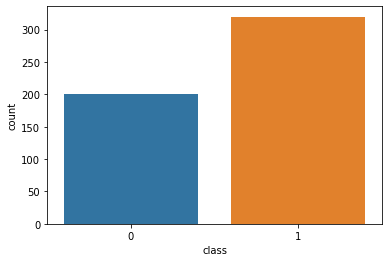

In [57]:
sns.countplot(x = df['class'])
plt.show()

### Plot correlation matrix on heatmap

<AxesSubplot:>

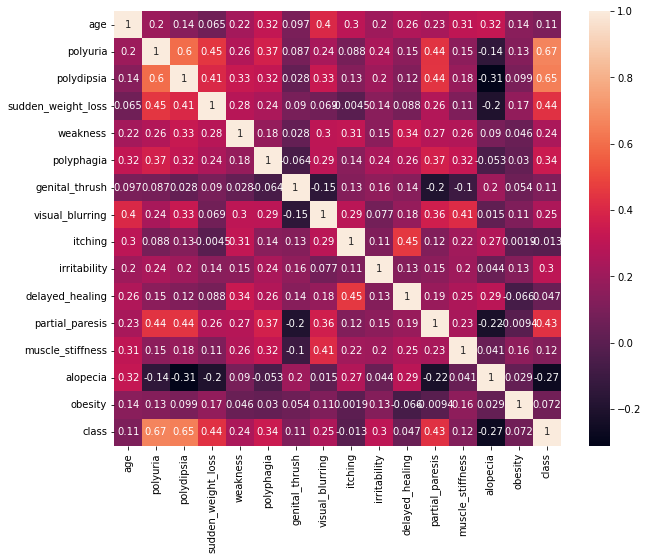

In [58]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

### Convert all categorical data into numerical

In [59]:
df = pd.get_dummies(df,drop_first=True)

In [60]:
df.head()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


### Split the dataset into Input & Target Variables

In [84]:
X = df.drop(columns = ['class'])
y = df['class']

### Standardise the input variables

In [86]:
scaler = StandardScaler()

In [87]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Split the dataset into Training & Testing set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

### Create Logistic Regression model & Train it

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)

LogisticRegression()

### Check the accuracy of our training set

In [68]:
model.score(X_train,y_train)

0.9471153846153846

### Make Predictions with X_test

In [69]:
y_pred = model.predict(X_test)

### Check accuracy score

In [70]:
accuracy_score(y_test, y_pred)

0.9038461538461539

### Plot confusion matrix on a heatmap

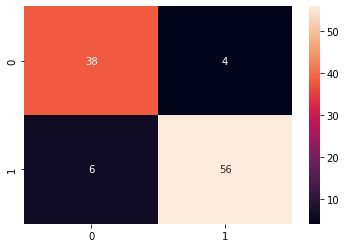

In [71]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.show()

### Print classification report

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.93      0.90      0.92        62

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



## Random Forest Model

### Train a Random Forest model

In [73]:
rf = RandomForestClassifier()

In [74]:
params = {'n_estimators':list(range(1,100))}

In [75]:
gsv = GridSearchCV(rf, params, cv = 3, scoring = 'accuracy')

In [76]:
gsv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

### Check accuracy of training set

In [77]:
gsv.score(X_train, y_train)

1.0

### Make predictions with X_test

In [78]:
y_pred = gsv.predict(X_test)

### Check accuracy score of our prediction

In [79]:
accuracy_score(y_test, y_pred)

0.9903846153846154

### Plot confusion matrix on a heatmap

<AxesSubplot:>

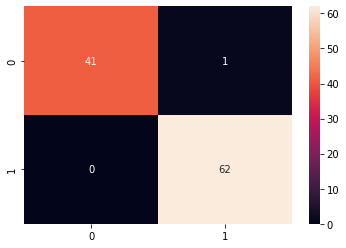

In [81]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot =True)

### Print Classification report

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.98      1.00      0.99        62

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



***

# <center><a href = "http://edure.in/"><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></a></center>